# 1.) Preprocess your data into scaled input variables and an output variable


In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/CLV.csv")


In [5]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [6]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,),(20,5,),(15,20),(10,20,10),(5,10,20)], 
    "activation" : ['relu','logistic'],
    'alpha': [0.0001, 0.001],
}

In [12]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (20, 5), (15, 20),
                                                (10, 20, 10), (5, 10, 20)]})

In [13]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 20, 10)}


In [15]:
print(grid.best_score_)

0.06527384167593116


# 3.) Train a model with the optimal solution from GridSearch

In [16]:
regressor = MLPRegressor(**grid.best_params_)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 20, 10))

In [17]:
y_pi = regressor.predict(X_train)
y_po = regressor.predict(X_test)

# 4.) What are the in-sample and out of sample MSEs

In [19]:
from sklearn.metrics import mean_squared_error
mse_tr = mean_squared_error(y_train, y_pi)
mse_tr

41378525.98097772

In [20]:
mse_te = mean_squared_error(y_test, y_po)
mse_te

47493015.7044372

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [21]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(20, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

In [25]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.01))
model.fit(X_train, y_train, batch_size = 32, epochs = 80)

Epoch 1/80
200/200 [==============================] - 1s 2ms/step - loss: 108693160.0000
Epoch 2/80
200/200 [==============================] - 0s 2ms/step - loss: 108693200.0000
Epoch 3/80
200/200 [==============================] - 0s 2ms/step - loss: 108693192.0000
Epoch 4/80
200/200 [==============================] - 0s 2ms/step - loss: 108693184.0000
Epoch 5/80
200/200 [==============================] - 1s 3ms/step - loss: 108693152.0000
Epoch 6/80
200/200 [==============================] - 1s 3ms/step - loss: 108693184.0000
Epoch 7/80
200/200 [==============================] - 0s 2ms/step - loss: 108693192.0000
Epoch 8/80
200/200 [==============================] - 1s 3ms/step - loss: 108693120.0000
Epoch 9/80
200/200 [==============================] - 1s 3ms/step - loss: 108693192.0000
Epoch 10/80
200/200 [==============================] - 1s 2ms/step - loss: 108693224.0000
Epoch 11/80
200/200 [==============================] - 0s 2ms/step - loss: 108693152.0000
Epoch 12/80
200/200

In [27]:
keras.models.save_model(model, '/content/gdrive/MyDrive/ECON441B')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

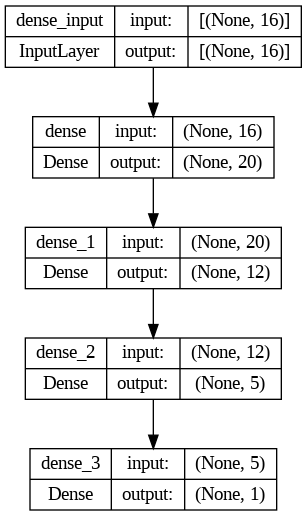

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [31]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="Keras Model", filename='/content/gdrive/MyDrive/ECON441B/saved_model.pdf')ni